In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
np.random.seed(42)

In [3]:
df = pd.read_excel('products.xlsx', usecols=['id', 'condition', 'category'], keep_default_na=False);

In [4]:
# Dataset clean up
img_name_pat = 'm\d+'
df_filter = df['id'].str.contains(img_name_pat, na=False)
df = df[df_filter]
df.head()

category condition            id
0  Studio Recording Equipment       New  m46490058971
1  Studio Recording Equipment       New  m41956262411
2  Studio Recording Equipment      Good  m48699763030
3  Studio Recording Equipment  Like New  m41645959650
4  Studio Recording Equipment      Good  m42480670580

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 <a list of 15 Text xticklabel objects>)

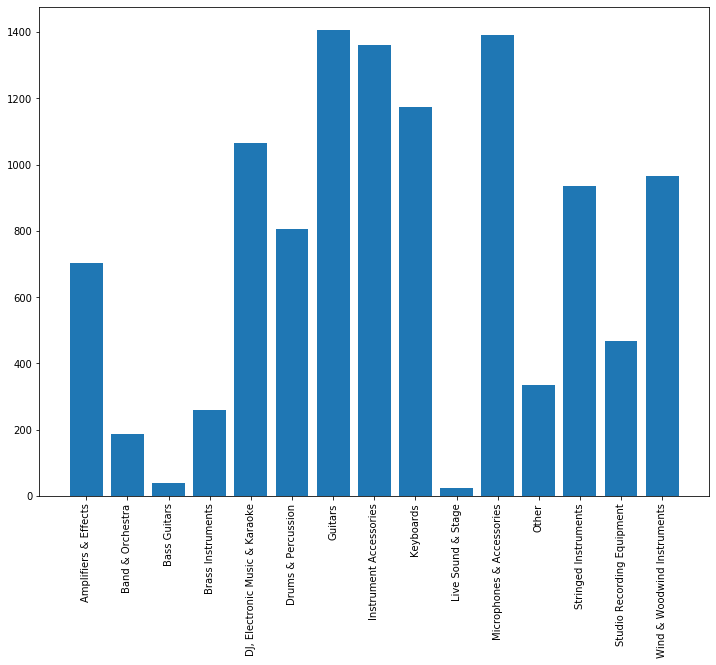

In [13]:
hist = df.groupby('category').count().id
plt.figure(figsize=(12,9))
plt.bar(hist.keys(), hist)
plt.xticks(rotation='vertical')

In [6]:
data = (ImageList.from_df(df, path='.', folder='img_n', cols='id', suffix='.jpg')
        .split_by_rand_pct()
        .label_from_df(cols=['category'], label_cls=CategoryList)
        .transform(get_transforms(), size=300)
        .databunch(bs=32).normalize(imagenet_stats))

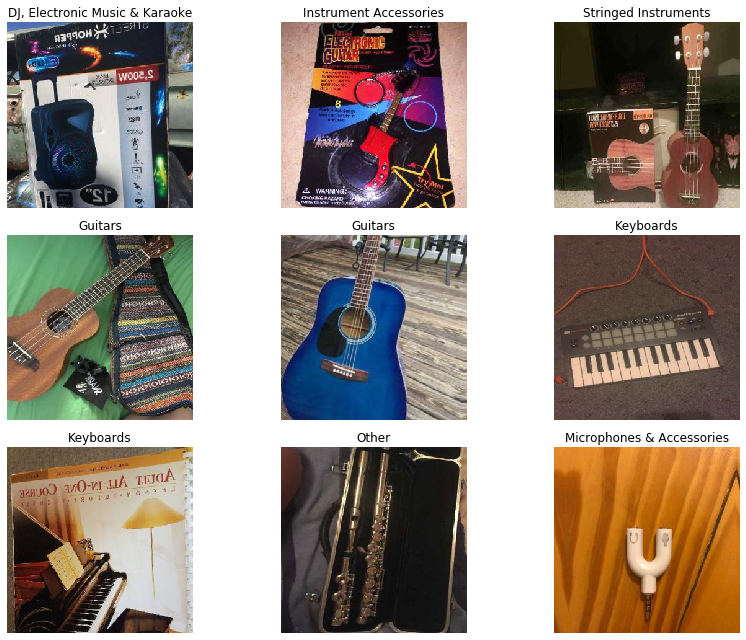

In [7]:
data.show_batch(rows=3, figsize=(12,9))

In [8]:
arch = models.resnet34
learn = cnn_learner(data, arch, metrics=accuracy)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


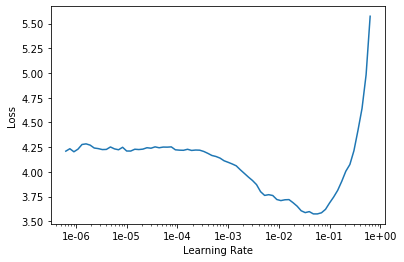

In [9]:
learn.lr_find()
learn.recorder.plot()

In [25]:
learn.fit_one_cycle(5, max_lr=1e-04)
learn.save('category-resnet34-stage5')

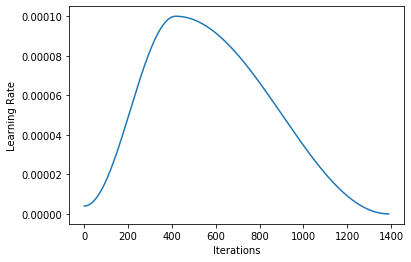

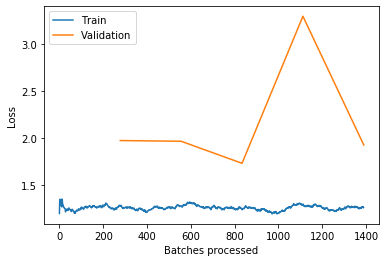

In [26]:
learn.recorder.plot_lr()
learn.recorder.plot_losses()

In [27]:
learn.load('category-resnet34-stage5');

In [10]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


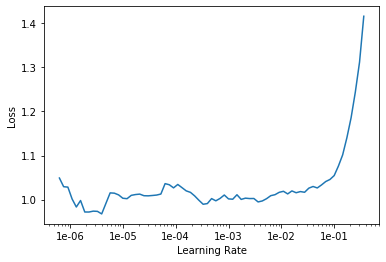

In [24]:
learn.lr_find()
learn.recorder.plot()

In [28]:
learn.fit_one_cycle(5, max_lr=slice(1e-06,5e-3))
learn.save('category-resnet34-finetuned-stage9')

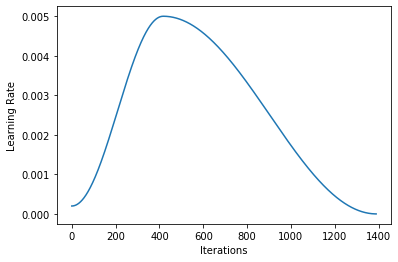

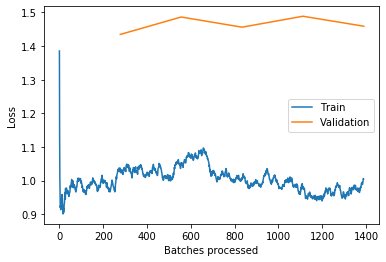

In [29]:
learn.recorder.plot_lr()
learn.recorder.plot_losses()

In [30]:
learn.load('category-resnet34-finetuned-stage9');

In [31]:
interp = ClassificationInterpretation.from_learner(learn);

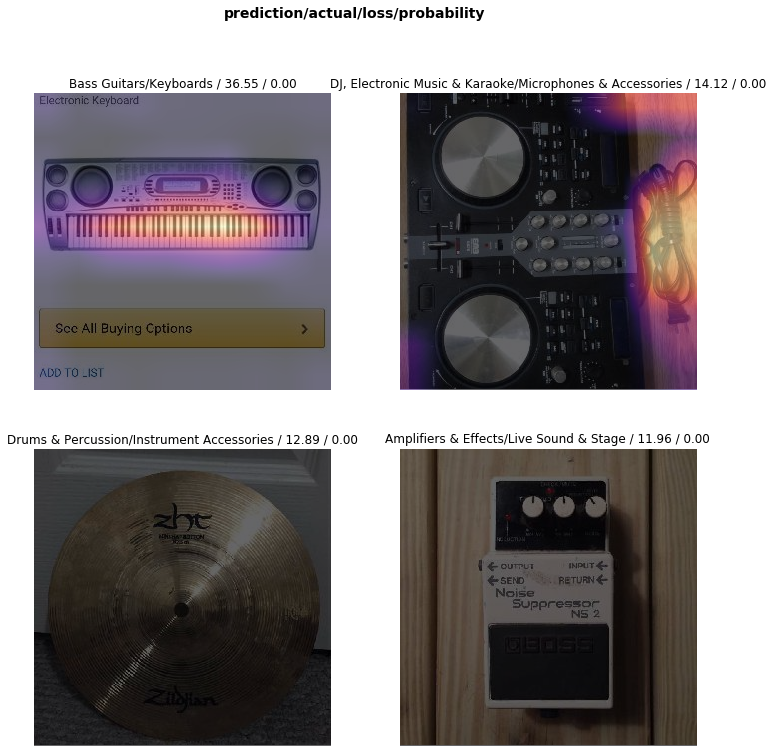

In [32]:
interp.plot_top_losses(4, figsize=(12,12))

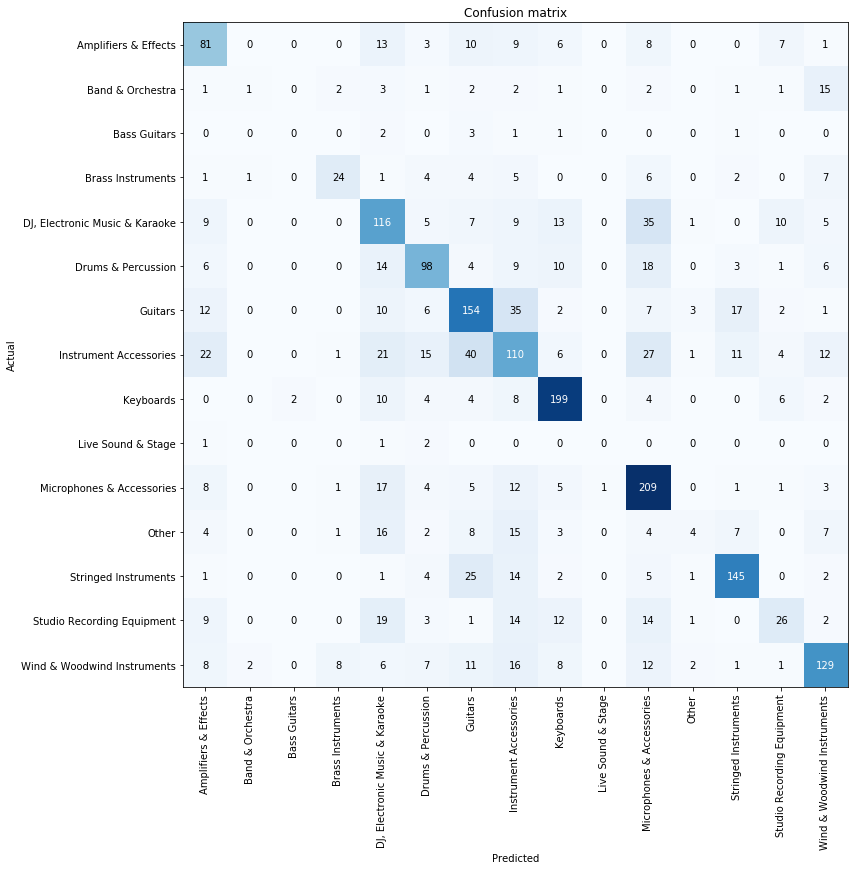

In [34]:
interp.plot_confusion_matrix(figsize=(12,12))

In [35]:
learn.validate()

[1.4588034, tensor(0.5827)]

In [38]:
learn.export('public_models/cv-category.pkl')